# Machine learning and deep learning methods applied to predicting customer status

Purpose: Predict active and not active clients based on the proposed data structure and naive data structure. Here, we implemented Support Vector Machines (SVM), Random Forest (RF), K-nearest Neighbours (KNN) and Lasso.

Author: Gabriel Rodrigues Palma and Rafael de Andrade Moral

# Packages used in the project

In [1]:
# Dataframe 
import pandas as pd
# PacMAP DR method
import pacmap

# Pre processing packages
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

# visualisation
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Functions used in the project

In [3]:
def create_dataset(path, response_class):
    ''' This function reads and prepare the datasets for applying the ML and DL methods'''
    data = pd.read_csv(path)
    data = data.drop(columns = ['Unnamed: 0', 'Subject'])
    explanatory_variables = data.drop(columns = response_class)
    response_variables = data[response_class]        
    binarizer = LabelBinarizer()
    response_variables = binarizer.fit_transform(response_variables)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    hot_encode_response_variable = onehot_encoder.fit_transform(np.array(response_variables).reshape(-1, 1))          
    
    return(explanatory_variables, 
           hot_encode_response_variable, response_variables)

# Importing Datasets

Before obtaining the performance of the learning algorithms selected for this paper, we need to import the datasets related to the Hidden Markov Models features and the peak features.

## Raw Midline EEG + Coordinate data Trial 1

In [5]:
all_raw_explanatory_variables_t1, \
  all_raw_hot_encode_response_variable_t1, all_raw_response_variable_t1 = create_dataset(path = '../../output_data/New_data/CoordinatesPlusEEGData/RawMidlinePlusCoordinateTrial1.csv', 
                                                                                        response_class = 'Class')

In [6]:
all_raw_explanatory_variables_t1.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5,dis_sum,angle_sum
0,1.085978e-07,-1.050929e-07,8.294140e-07,-5.906837e-10,0.868,0.604,0.129,0.074,0.515900,0.484100,...,0.032,0.047,0.025,0.180843,0.240996,0.243103,0.144828,0.190230,4.007659,651.069516
1,1.080854e-07,-1.045971e-07,8.527908e-07,-6.459901e-10,0.590,0.899,0.096,0.184,0.530876,0.469124,...,0.046,0.051,0.030,0.156503,0.214782,0.282709,0.138557,0.207449,4.350488,1406.028426
2,-6.478640e-08,6.269551e-08,6.327935e-07,-5.413374e-10,0.709,0.466,0.127,0.065,0.404959,0.595041,...,0.120,0.021,0.018,0.229291,0.181818,0.179896,0.210456,0.198539,4.195562,882.929882
3,-1.573635e-09,1.522849e-09,6.501585e-07,-4.326145e-10,0.699,0.481,0.089,0.067,0.440678,0.559322,...,0.028,0.019,0.044,0.190293,0.208398,0.214176,0.224769,0.162365,4.203073,1916.215396
4,2.001960e-07,-1.937350e-07,9.778229e-07,-7.200449e-10,0.722,1.087,0.105,0.164,0.627565,0.372435,...,0.056,0.030,0.027,0.237708,0.252226,0.111692,0.255517,0.142857,3.978881,2061.484914


## Raw Midline EEG + Coordinates data Trial 12

In [7]:
all_raw_explanatory_variables_t12, \
  all_raw_hot_encode_response_variable_t12, all_raw_response_variable_t12 = create_dataset(path = '../../output_data/New_data/CoordinatesPlusEEGData/RawMidlinePlusCoordinateTrial12.csv', 
                                                                                           response_class = 'Class')

In [8]:
all_raw_explanatory_variables_t12.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5,dis_sum,angle_sum
0,1.156881e-07,-1.077369e-07,9.165390e-07,-7.693143e-10,0.959,0.677,0.146,0.095,0.315457,0.684543,...,0.056,0.027,0.133,0.194532,0.219769,0.256572,0.170347,0.158780,0.610205,225.982551
1,9.669676e-08,-9.005086e-08,8.743374e-07,-7.271431e-10,0.620,1.054,0.058,0.297,0.590447,0.409553,...,0.015,0.088,0.305,0.149390,0.257114,0.183943,0.295732,0.113821,0.753753,240.335305
2,-4.570386e-08,4.256267e-08,5.965999e-07,-4.592086e-10,0.425,0.694,0.044,0.180,0.470644,0.529356,...,0.013,0.052,0.182,0.129735,0.188447,0.133523,0.357008,0.191288,0.496671,93.845292
3,1.880012e-08,-1.750800e-08,7.036014e-07,-5.416457e-10,0.787,0.513,0.118,0.062,0.423729,0.576271,...,0.018,0.052,0.095,0.095450,0.329170,0.116860,0.266726,0.191793,0.614849,1046.380417
4,1.369923e-07,-1.275770e-07,9.263932e-07,-7.455344e-10,1.006,0.643,0.159,0.118,0.412071,0.587929,...,0.015,0.022,0.136,0.262227,0.234131,0.123829,0.138398,0.241415,0.762090,56.845578


## Zscored scale Midline EEG + Coordinates data Trial 12

In [9]:
all_Zscored_scale_explanatory_variables_t1, \
  all_Zscored_scale_hot_encode_response_variable_t1, all_Zscored_scale_response_variable_t1 = create_dataset(path = '../../output_data/New_data/CoordinatesPlusEEGData/ZscoredScaledPlusCoordinateTrial1.csv', 
                                                                                           response_class = 'Class')

In [10]:
all_Zscored_scale_explanatory_variables_t1.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5,dis_sum,angle_sum
0,0.430807,-9.240701,0.899261,-0.002411,0.348,0.216,0.065,0.037,0.515900,0.484100,...,0.016,0.024,0.012,0.180843,0.240996,0.243103,0.144828,0.190230,4.007659,651.069516
1,0.379726,-28.295271,0.994679,-0.002637,0.209,0.364,0.048,0.092,0.530876,0.469124,...,0.023,0.026,0.015,0.156503,0.214782,0.282709,0.138557,0.207449,4.350488,1406.028426
2,-0.190530,30.395558,0.096708,-0.002210,0.269,0.147,0.064,0.032,0.404959,0.595041,...,0.060,0.010,0.009,0.229291,0.181818,0.179896,0.210456,0.198539,4.195562,882.929882
3,0.018348,11.094229,0.167587,-0.001766,0.264,0.155,0.045,0.034,0.440678,0.559322,...,0.014,0.009,0.022,0.190485,0.208398,0.214176,0.224576,0.162365,4.203073,1916.215396
4,0.738628,-31.642053,1.505026,-0.002939,0.275,0.459,0.053,0.082,0.627565,0.372435,...,0.028,0.015,0.014,0.237708,0.252226,0.111692,0.255517,0.142857,3.978881,2061.484914


## Zscored scale Midline EEG + Coordinates data Trial 12

In [11]:
all_Zscored_scale_explanatory_variables_t12, \
  all_Zscored_scale_hot_encode_response_variable_t12, all_Zscored_scale_response_variable_t12 = create_dataset(path = '../../output_data/New_data/CoordinatesPlusEEGData/ZscoredScaledPlusCoordinateTrial12.csv', 
                                                                                           response_class = 'Class')

In [12]:
all_Zscored_scale_explanatory_variables_t12.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5,dis_sum,angle_sum
0,0.505831,3.734294,1.254882,-0.003140,0.394,0.253,0.073,0.048,0.315457,0.684543,...,0.028,0.014,0.067,0.194532,0.219769,0.256572,0.170347,0.158780,0.610205,225.982551
1,0.154855,-90.618525,1.082626,-0.002968,0.224,0.442,0.029,0.149,0.590447,0.409553,...,0.008,0.044,0.153,0.149390,0.257114,0.183943,0.295732,0.113821,0.753753,240.335305
2,-0.381763,-108.664622,-0.051024,-0.001874,0.126,0.261,0.022,0.090,0.470644,0.529356,...,0.007,0.026,0.091,0.129735,0.188447,0.133523,0.357008,0.191288,0.496671,93.845292
3,-0.024115,-51.478291,0.385727,-0.002211,0.308,0.171,0.059,0.031,0.423729,0.576271,...,0.009,0.026,0.048,0.095450,0.329170,0.116860,0.266726,0.191793,0.614849,1046.380417
4,0.289524,-99.254789,1.295104,-0.003043,0.418,0.236,0.080,0.059,0.412071,0.587929,...,0.007,0.011,0.068,0.262227,0.234131,0.123829,0.138398,0.241415,0.762090,56.845578


## Minmax scale Midline EEG + Coordinates data Trial 1

In [13]:
all_Minmax_scale_explanatory_variables_t1, \
  all_Minmax_scale_hot_encode_response_variable_t1, all_Minmax_scale_response_variable_t1 = create_dataset(path = '../../output_data/New_data/CoordinatesPlusEEGData/MinmaxscalePlusCoordinateTrial1.csv', 
                                                                                           response_class = 'Class')

In [14]:
all_Minmax_scale_explanatory_variables_t1.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5,dis_sum,angle_sum
0,0.052283,-10.740852,0.329249,-0.000296,0.348,0.216,0.065,0.037,0.515900,0.484100,...,0.016,0.024,0.012,0.180843,0.240996,0.243103,0.144828,0.190230,4.007659,651.069516
1,0.052178,-10.722025,0.340976,-0.000324,0.209,0.364,0.048,0.092,0.530876,0.469124,...,0.023,0.026,0.015,0.156503,0.214782,0.282709,0.138557,0.207449,4.350488,1406.028426
2,-0.030231,6.213944,0.230614,-0.000272,0.269,0.147,0.064,0.032,0.404959,0.595041,...,0.060,0.010,0.009,0.229291,0.181818,0.179896,0.210456,0.198539,4.195562,882.929882
3,-0.000309,0.064725,0.239325,-0.000217,0.264,0.155,0.045,0.034,0.440678,0.559322,...,0.014,0.009,0.022,0.190485,0.208398,0.214176,0.224576,0.162365,4.203073,1916.215396
4,0.094943,-19.507132,0.403699,-0.000361,0.275,0.459,0.053,0.082,0.627565,0.372435,...,0.028,0.015,0.014,0.237708,0.252226,0.111692,0.255517,0.142857,3.978881,2061.484914


## Minmax scale Midline EEG + Coordinates data Trial 12

In [15]:
all_Minmax_scale_explanatory_variables_t12, \
  all_Minmax_scale_hot_encode_response_variable_t12, all_Minmax_scale_response_variable_t12 = create_dataset(path = '../../output_data/New_data/CoordinatesPlusEEGData/MinmaxscalePlusCoordinateTrial12.csv', 
                                                                                           response_class = 'Class')

In [16]:
all_Minmax_scale_explanatory_variables_t12.head()

,MM_Intercept,MM_Hess,average_peak_magnitude,average_peak_curvature,hmm2_mean.1,hmm2_mean.2,hmm2_sd.1,hmm2_sd.2,hmm2_p1,hmm2_p2,...,hmm5_sd.3,hmm5_sd.4,hmm5_sd.5,hmm5_p1,hmm5_p2,hmm5_p3,hmm5_p4,hmm5_p5,dis_sum,angle_sum
0,0.061130,0.705040,0.372955,-0.000386,0.394,0.253,0.073,0.048,0.315457,0.684543,...,0.028,0.014,0.067,0.194532,0.219769,0.256572,0.170347,0.158780,0.610205,225.982551
1,0.020163,-88.391867,0.351785,-0.000365,0.224,0.442,0.029,0.149,0.590447,0.409553,...,0.008,0.044,0.153,0.149390,0.257114,0.183943,0.295732,0.113821,0.753753,240.335305
2,-0.044913,-101.184206,0.212457,-0.000230,0.126,0.261,0.022,0.090,0.470644,0.529356,...,0.007,0.026,0.091,0.129735,0.188447,0.133523,0.357008,0.191288,0.496671,93.845292
3,-0.001816,-48.016730,0.266135,-0.000272,0.308,0.171,0.059,0.031,0.423729,0.576271,...,0.009,0.026,0.048,0.095450,0.329170,0.116860,0.266726,0.191793,0.614849,1046.380417
4,0.037201,-95.792486,0.377899,-0.000374,0.418,0.236,0.080,0.059,0.412071,0.587929,...,0.007,0.011,0.068,0.262227,0.234131,0.123829,0.138398,0.241415,0.762090,56.845578


# Visualizing the data using PacMap

## Raw Midline EEG data Trial 1

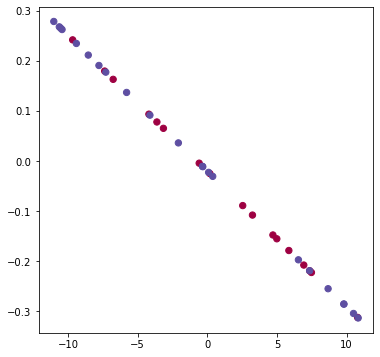

In [73]:
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=5, MN_ratio=0.5, FP_ratio=2.0) 
X_transformed = embedding.fit_transform(all_raw_explanatory_variables_t1, init="pca")
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], 
           cmap="Spectral", c = all_raw_response_variable_t1, s=40)

In [ ]:
# data = pd.DataFrame(X_transformed, columns = ['x1', 'x2'])
# data['class'] = np.concatenate((train_labels, test_labels), axis = 0)
#data.to_csv('../../output_data/PaCMAP_VGG16_original_dataset.csv')

## Raw Midline EEG data Trial 12

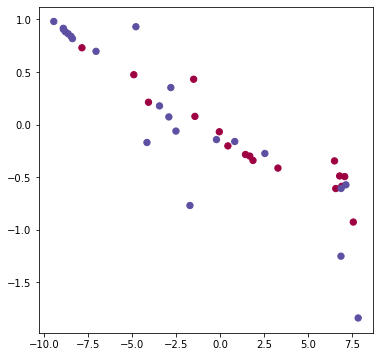

In [59]:
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=8, MN_ratio=0.5, FP_ratio=2.0) 
X_transformed = embedding.fit_transform(all_raw_explanatory_variables_t12, init="pca")
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], 
           cmap="Spectral", c = all_raw_response_variable_t12, s=40)

In [ ]:
# data = pd.DataFrame(X_transformed, columns = ['x1', 'x2'])
# data['class'] = np.concatenate((train_labels, test_labels), axis = 0)
#data.to_csv('../../output_data/PaCMAP_VGG16_original_dataset.csv')

## Zscored scale Midline EEG data Trial 1

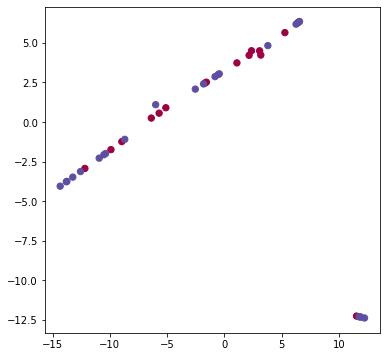

In [57]:
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=3, MN_ratio=0.5, FP_ratio=2.0) 
X_transformed = embedding.fit_transform(all_Zscored_scale_explanatory_variables_t1, init="pca")
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], 
           cmap="Spectral", c = all_Zscored_scale_response_variable_t1, s=40)

In [ ]:
# data = pd.DataFrame(X_transformed, columns = ['x1', 'x2'])
# data['class'] = np.concatenate((train_labels, test_labels), axis = 0)
#data.to_csv('../../output_data/PaCMAP_VGG16_original_dataset.csv')

## Zscored scale Midline EEG data Trial 12

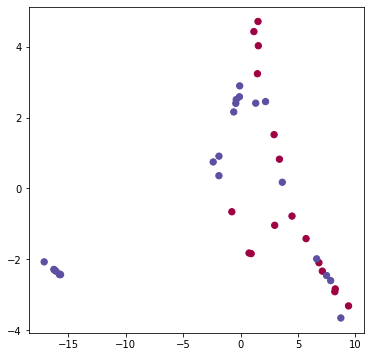

In [51]:
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=3, MN_ratio=0.5, FP_ratio=2.0) 
X_transformed = embedding.fit_transform(all_Zscored_scale_explanatory_variables_t12, init="pca")
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], 
           cmap="Spectral", c = all_Zscored_scale_response_variable_t12, s=40)

In [ ]:
# data = pd.DataFrame(X_transformed, columns = ['x1', 'x2'])
# data['class'] = np.concatenate((train_labels, test_labels), axis = 0)
#data.to_csv('../../output_data/PaCMAP_VGG16_original_dataset.csv')